In [162]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
import pandas_profiling
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import warnings
warnings.filterwarnings('ignore')

# Data Customer

In [2]:
data_customer = pd.read_csv("data/Case Study - Customer.csv", sep=';')

In [3]:
data_customer

CustomerID  Age  Gender Marital Status Income
0             1   55       1        Married   5,12
1             2   60       1        Married   6,23
2             3   32       1        Married   9,17
3             4   31       1        Married   4,87
4             5   58       1        Married   3,57
..          ...  ...     ...            ...    ...
442         443   33       1            NaN   9,28
443         444   53       0        Married  15,31
444         445   51       0        Married  14,48
445         446   57       0        Married   7,81
446         447   54       1        Married  20,37

[447 rows x 5 columns]

In [4]:
data_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 447 entries, 0 to 446
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   CustomerID      447 non-null    int64 
 1   Age             447 non-null    int64 
 2   Gender          447 non-null    int64 
 3   Marital Status  444 non-null    object
 4   Income          447 non-null    object
dtypes: int64(3), object(2)
memory usage: 17.6+ KB


In [6]:
data_customer.isnull().sum()

CustomerID        0
Age               0
Gender            0
Marital Status    3
Income            0
dtype: int64

In [5]:
data_customer.dropna(subset=['Marital Status'], inplace=True)

In [6]:
data_customer.shape

(444, 5)

In [6]:
data_customer = data_customer.reset_index(drop=True)

In [7]:
data_customer.duplicated().sum()

0

In [7]:
data_customer['Income'] = data_customer['Income'].str.replace(',','.').astype(float)
data_customer

CustomerID  Age  Gender Marital Status  Income
0             1   55       1        Married    5.12
1             2   60       1        Married    6.23
2             3   32       1        Married    9.17
3             4   31       1        Married    4.87
4             5   58       1        Married    3.57
..          ...  ...     ...            ...     ...
441         442   42       1        Married   14.88
443         444   53       0        Married   15.31
444         445   51       0        Married   14.48
445         446   57       0        Married    7.81
446         447   54       1        Married   20.37

[444 rows x 5 columns]

In [8]:
data_customer.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 444 entries, 0 to 446
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   CustomerID      444 non-null    int64  
 1   Age             444 non-null    int64  
 2   Gender          444 non-null    int64  
 3   Marital Status  444 non-null    object 
 4   Income          444 non-null    float64
dtypes: float64(1), int64(3), object(1)
memory usage: 20.8+ KB


In [10]:
data_customer.corr()

CustomerID       Age    Gender    Income
CustomerID    1.000000 -0.027250 -0.015732 -0.017471
Age          -0.027250  1.000000 -0.041407  0.481009
Gender       -0.015732 -0.041407  1.000000 -0.090893
Income       -0.017471  0.481009 -0.090893  1.000000

In [9]:
data_customer.describe()

CustomerID         Age      Gender
count  444.000000  444.000000  444.000000
mean   223.556306   39.840090    0.454955
std    128.475517   12.870745    0.498529
min      1.000000    0.000000    0.000000
25%    112.750000   30.000000    0.000000
50%    223.500000   39.000000    0.000000
75%    334.250000   51.000000    1.000000
max    447.000000   72.000000    1.000000

In [161]:
pandas_profiling.ProfileReport(data_customer)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

<AxesSubplot:xlabel='Gender', ylabel='count'>

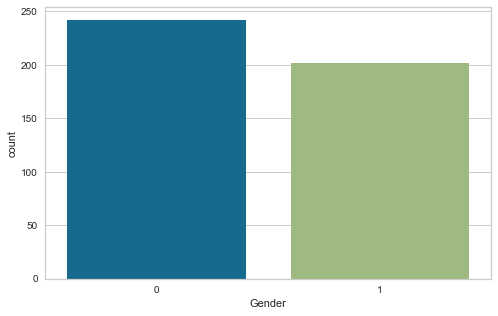

In [164]:
plt.figure(figsize=(8,5))
sns.countplot(x="Gender", data=data_customer)

<AxesSubplot:xlabel='Marital Status', ylabel='count'>

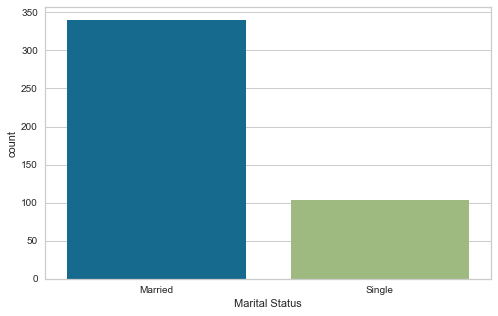

In [165]:
plt.figure(figsize=(8,5))
sns.countplot(x="Marital Status", data=data_customer)

# Data Transaksi

In [9]:
data_transaksi = pd.read_csv("data/Case Study - Transaction.csv", sep=';')

In [10]:
data_transaksi.head()

TransactionID  CustomerID        Date ProductID  Price  Qty  TotalAmount  \
0       TR11369         328  01/01/2022        P3   7500    4        30000   
1       TR16356         165  01/01/2022        P9  10000    7        70000   
2        TR1984         183  01/01/2022        P1   8800    4        35200   
3       TR35256         160  01/01/2022        P1   8800    7        61600   
4       TR41231         386  01/01/2022        P9  10000    1        10000   

   StoreID  
0       12  
1        1  
2        4  
3        4  
4        4

In [11]:
data_transaksi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5020 entries, 0 to 5019
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TransactionID  5020 non-null   object
 1   CustomerID     5020 non-null   int64 
 2   Date           5020 non-null   object
 3   ProductID      5020 non-null   object
 4   Price          5020 non-null   int64 
 5   Qty            5020 non-null   int64 
 6   TotalAmount    5020 non-null   int64 
 7   StoreID        5020 non-null   int64 
dtypes: int64(5), object(3)
memory usage: 313.9+ KB


In [36]:
data_transaksi.isnull().sum()

TransactionID    0
CustomerID       0
Date             0
ProductID        0
Price            0
Qty              0
TotalAmount      0
StoreID          0
dtype: int64

In [37]:
data_transaksi.duplicated().sum()

0

In [46]:
data_transaksi.corr()

CustomerID     Price       Qty  TotalAmount   StoreID
CustomerID     1.000000 -0.016423 -0.009755    -0.024915  0.004129
Price         -0.016423  1.000000 -0.353640     0.440632 -0.032863
Qty           -0.009755 -0.353640  1.000000     0.621129  0.014365
TotalAmount   -0.024915  0.440632  0.621129     1.000000 -0.010722
StoreID        0.004129 -0.032863  0.014365    -0.010722  1.000000

In [163]:
pandas_profiling.ProfileReport(data_transaksi)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [12]:
df = data_customer.merge(data_transaksi)
df

CustomerID  Age  Gender Marital Status  Income TransactionID  \
0              1   55       1        Married    5.12       TR54475   
1              1   55       1        Married    5.12       TR44292   
2              1   55       1        Married    5.12        TR7576   
3              1   55       1        Married    5.12        TR2162   
4              1   55       1        Married    5.12       TR14167   
...          ...  ...     ...            ...     ...           ...   
4971         447   54       1        Married   20.37        TR8891   
4972         447   54       1        Married   20.37       TR11859   
4973         447   54       1        Married   20.37       TR27494   
4974         447   54       1        Married   20.37       TR59640   
4975         447   54       1        Married   20.37       TR74716   

            Date ProductID  Price  Qty  TotalAmount  StoreID  
0     23/02/2022        P8  16000    1        16000        9  
1     05/05/2022        P3   7500    4        30000        1  
2     06/05/2022        P7   9400    2        18800        2  
3     03/06/2022       P10  15000    4        60000       14  
4     24/06/2022        P1   8800    7        61600        2  
...          ...       ...    ...  ...          ...      ...  
4971  08/08/2022       P10  15000    3        45000        9  
4972  15/08/2022        P6  18000    4        72000        9  
4973  08/09/2022        P2   3200    7        22400        4  
4974  04/10/2022       P10  15000    1        15000       14  
4975  21/11/2022       P10  15000    3        45000       10  

[4976 rows x 12 columns]

# Data for Cluster

In [21]:
df_agg = df.groupby(['CustomerID']).agg({
    'TransactionID' : 'count',
    'Qty' : 'sum',
    'TotalAmount' : 'sum'
}).reset_index()
df_cluster

Age  Gender Marital Status  Income
0     55       1        Married    5.12
1     60       1        Married    6.23
2     32       1        Married    9.17
3     31       1        Married    4.87
4     58       1        Married    3.57
..   ...     ...            ...     ...
439   42       1        Married   14.88
440   53       0        Married   15.31
441   51       0        Married   14.48
442   57       0        Married    7.81
443   54       1        Married   20.37

[444 rows x 4 columns]

In [22]:
df_agg = df_agg.rename(columns={'TransactionID': 'TotalTransaction', 'Qty':'TotalQty'})
df_agg

CustomerID  TotalTransaction  TotalQty  TotalAmount
0             1                17        60       623300
1             2                13        57       392300
2             3                15        56       446200
3             4                10        46       302500
4             5                 7        27       268600
..          ...               ...       ...          ...
439         442                13        37       269400
440         444                18        62       577700
441         445                18        68       587200
442         446                11        42       423300
443         447                13        42       439300

[444 rows x 4 columns]

# Data merge Transaksi dan Customer w/ Outlier

In [23]:
df_customer = data_customer.copy()
df_customer

CustomerID  Age  Gender Marital Status  Income
0             1   55       1        Married    5.12
1             2   60       1        Married    6.23
2             3   32       1        Married    9.17
3             4   31       1        Married    4.87
4             5   58       1        Married    3.57
..          ...  ...     ...            ...     ...
441         442   42       1        Married   14.88
443         444   53       0        Married   15.31
444         445   51       0        Married   14.48
445         446   57       0        Married    7.81
446         447   54       1        Married   20.37

[444 rows x 5 columns]

In [48]:
df_cluster_out = df_customer.merge(df_agg)
df_cluster_out

CustomerID  Age  Gender Marital Status  Income  TotalTransaction  \
0             1   55       1        Married    5.12                17   
1             2   60       1        Married    6.23                13   
2             3   32       1        Married    9.17                15   
3             4   31       1        Married    4.87                10   
4             5   58       1        Married    3.57                 7   
..          ...  ...     ...            ...     ...               ...   
439         442   42       1        Married   14.88                13   
440         444   53       0        Married   15.31                18   
441         445   51       0        Married   14.48                18   
442         446   57       0        Married    7.81                11   
443         447   54       1        Married   20.37                13   

     TotalQty  TotalAmount  
0          60       623300  
1          57       392300  
2          56       446200  
3          46       302500  
4          27       268600  
..        ...          ...  
439        37       269400  
440        62       577700  
441        68       587200  
442        42       423300  
443        42       439300  

[444 rows x 8 columns]

In [49]:
df_cluster_out = df_cluster_out.drop(columns='CustomerID')

In [50]:
df_cluster_out.head()

Age  Gender Marital Status  Income  TotalTransaction  TotalQty  TotalAmount
0   55       1        Married    5.12                17        60       623300
1   60       1        Married    6.23                13        57       392300
2   32       1        Married    9.17                15        56       446200
3   31       1        Married    4.87                10        46       302500
4   58       1        Married    3.57                 7        27       268600

In [52]:
le_out = LabelEncoder()
le_out.fit(df_cluster_out['Marital Status'])
df_cluster_out['Marital Status'] = le_out.transform(df_cluster_out['Marital Status'])
df_cluster_out

Age  Gender  Marital Status  Income  TotalTransaction  TotalQty  \
0     55       1               0    5.12                17        60   
1     60       1               0    6.23                13        57   
2     32       1               0    9.17                15        56   
3     31       1               0    4.87                10        46   
4     58       1               0    3.57                 7        27   
..   ...     ...             ...     ...               ...       ...   
439   42       1               0   14.88                13        37   
440   53       0               0   15.31                18        62   
441   51       0               0   14.48                18        68   
442   57       0               0    7.81                11        42   
443   54       1               0   20.37                13        42   

     TotalAmount  
0         623300  
1         392300  
2         446200  
3         302500  
4         268600  
..           ...  
439       269400  
440       577700  
441       587200  
442       423300  
443       439300  

[444 rows x 7 columns]

In [53]:
scaler_out = StandardScaler()
scaler_out.fit(df_cluster_out)
df_scaled_out = pd.DataFrame(scaler.transform(df_cluster_out), 
                         columns=df_cluster_out.columns)

In [54]:
pca_out = PCA(n_components=2)
pca_out.fit(df_scaled_out)
reduced_data_out = pd.DataFrame(pca.transform(df_scaled_out), columns=['col1','col2'])

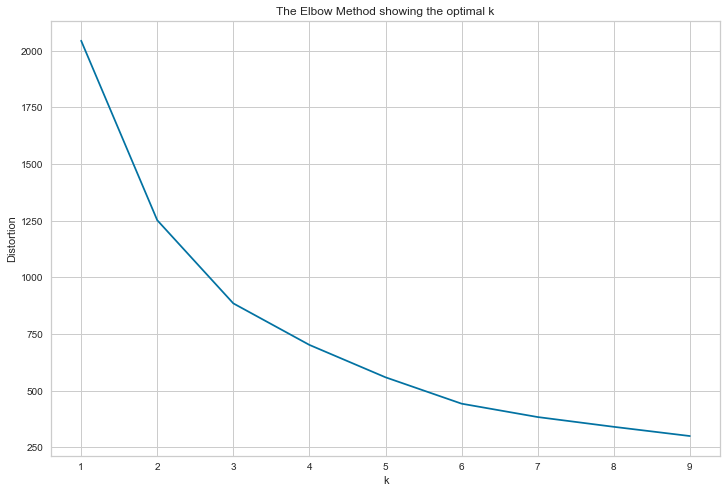

In [42]:
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(reduced_data_out)
    distortions.append(kmeanModel.inertia_)
    
plt.figure(figsize=(12,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

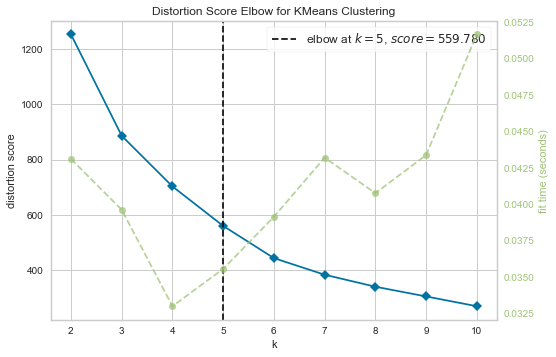

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [43]:
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(reduced_data_out)
Elbow_M.show()

In [45]:
kmeans_out = KMeans(n_clusters=5)
predict_out = kmeans_out.fit_predict(reduced_data_out)

In [47]:
silhouette_avg = silhouette_score(reduced_data_out, predict_out)
print("silhouette_score from cluster 5 :\n", silhouette_avg)

silhouette_score from cluster 5 :
 0.34615668929004406


Hasil dari outlier:
- silhouette_score from cluster 5 : 0.3458977922160057

Kmeans sensitif terhadap outlier

# Data merge Transaksi dan Customer No Outlier

In [138]:
df_cluster = df_customer.merge(df_agg)
df_cluster

CustomerID  Age  Gender Marital Status  Income  TotalTransaction  \
0             1   55       1        Married    5.12                17   
1             2   60       1        Married    6.23                13   
2             3   32       1        Married    9.17                15   
3             4   31       1        Married    4.87                10   
4             5   58       1        Married    3.57                 7   
..          ...  ...     ...            ...     ...               ...   
439         442   42       1        Married   14.88                13   
440         444   53       0        Married   15.31                18   
441         445   51       0        Married   14.48                18   
442         446   57       0        Married    7.81                11   
443         447   54       1        Married   20.37                13   

     TotalQty  TotalAmount  
0          60       623300  
1          57       392300  
2          56       446200  
3          46       302500  
4          27       268600  
..        ...          ...  
439        37       269400  
440        62       577700  
441        68       587200  
442        42       423300  
443        42       439300  

[444 rows x 8 columns]

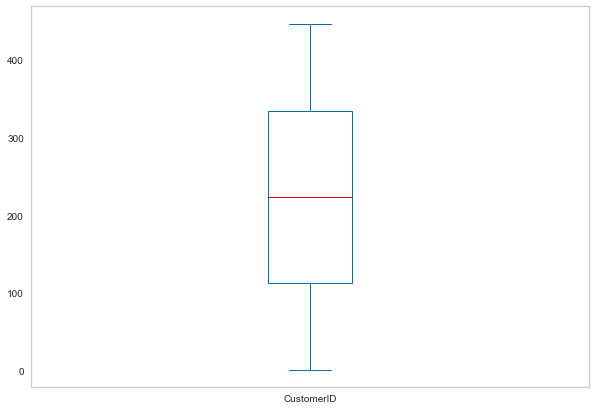

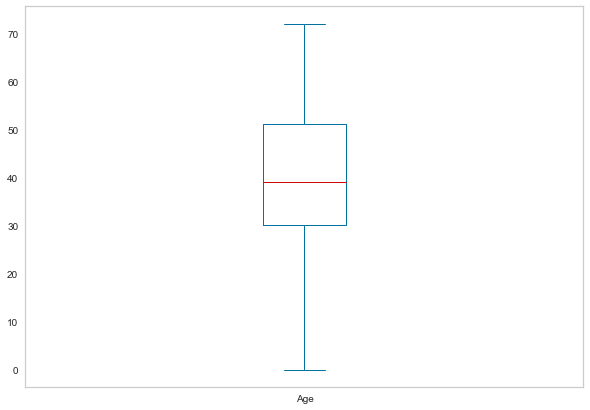

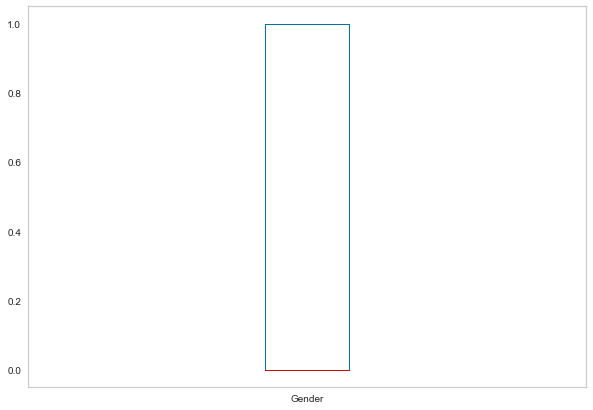

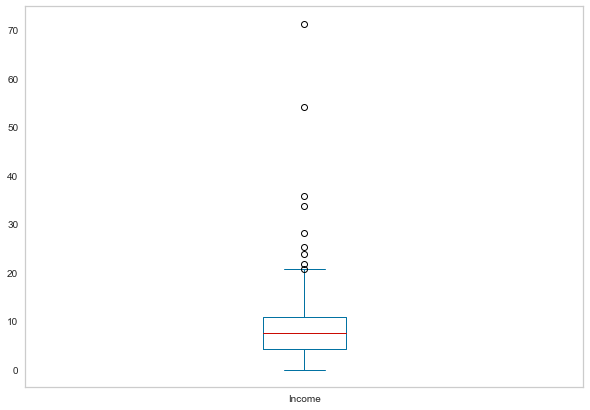

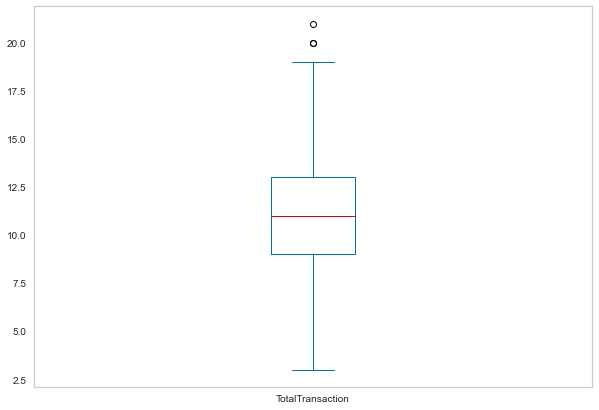

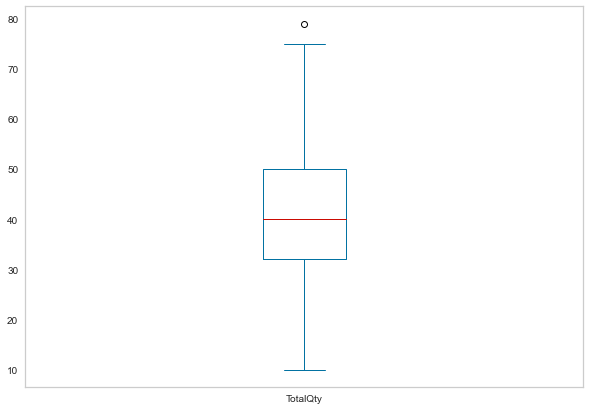

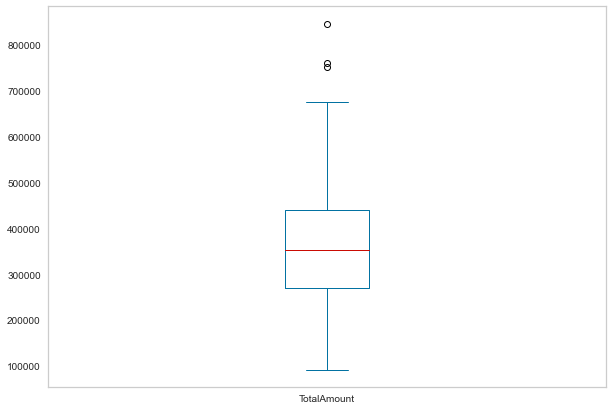

In [139]:
df_num = df_cluster.select_dtypes("number").columns.to_list()
for i in df_num:
    df_cluster[i].plot(kind="box", figsize=(10, 7))
    plt.grid()
    plt.show()

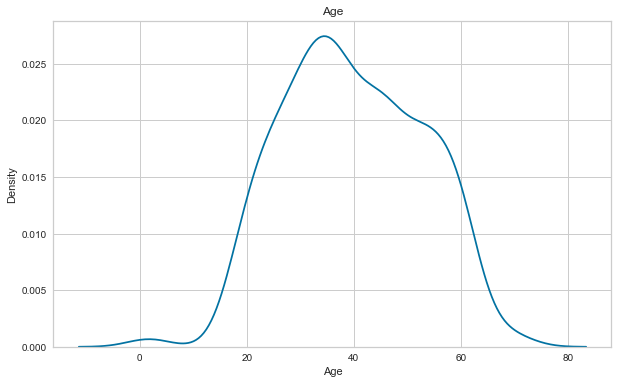

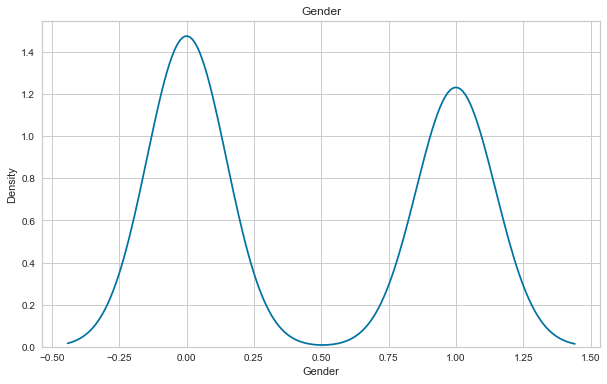

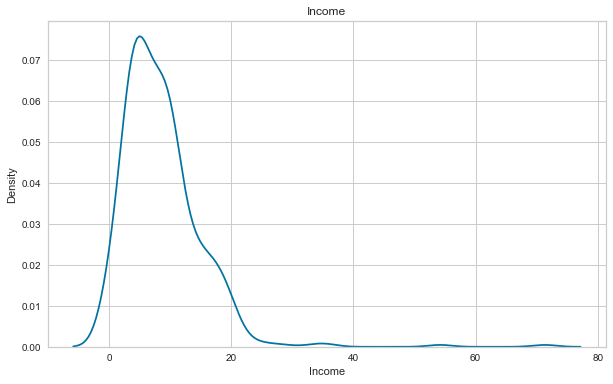

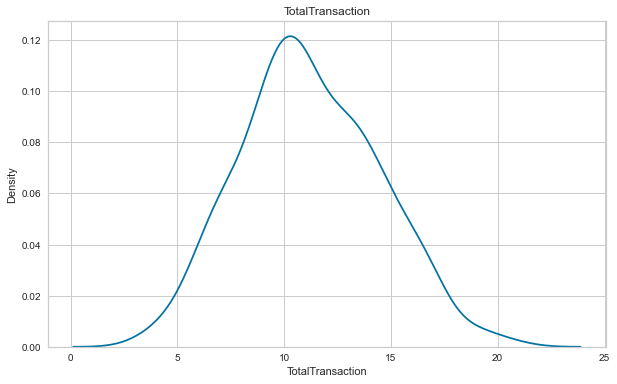

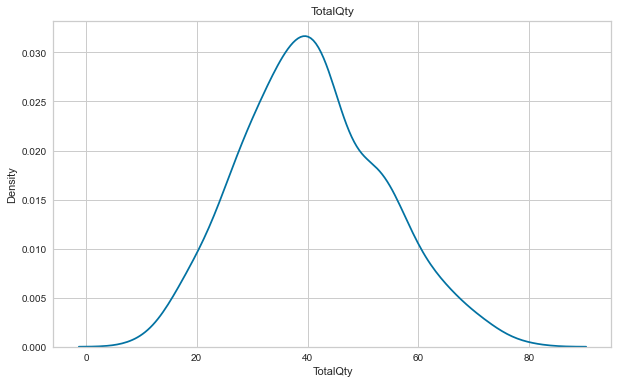

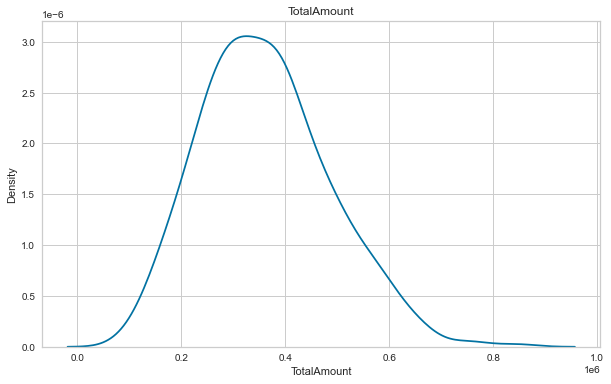

In [58]:
#check distribution data numeric whether outlier
df_num = df_cluster.select_dtypes("number").columns.to_list()
for i in df_num:
    plt.figure(figsize=(10,6))
    sns.kdeplot(x=i, data=df_cluster)
    plt.title(i)

In [87]:
df_cluster.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 444 entries, 0 to 443
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   CustomerID      444 non-null    int64  
 1   Age             444 non-null    int64  
 2   Gender          444 non-null    int64  
 3   Marital Status  444 non-null    object 
 4   Income          444 non-null    float64
 5   TransactionID   444 non-null    int64  
 6   Qty             444 non-null    int64  
 7   TotalAmount     444 non-null    int64  
dtypes: float64(1), int64(6), object(1)
memory usage: 31.2+ KB


### Find Outlier

In [59]:
def find_outliers_IQR(df):
   q1=df.quantile(0.25)
   q3=df.quantile(0.75)
   IQR=q3-q1
   outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]
   print(q1)
   print(q3)
   print(IQR)
   return outliers

In [60]:
outliers1 = find_outliers_IQR(df_cluster['Income'])
print('number of outliers: '+ str(len(outliers1)))
print('max outlier value: '+ str(outliers1.max()))
print('min outlier value: '+ str(outliers1.min()))

4.21
10.844999999999999
6.634999999999999
number of outliers: 9
max outlier value: 71.3
min outlier value: 20.81


In [61]:
outliers1

99     54.20
111    71.30
131    20.81
186    25.22
244    21.81
358    35.78
397    33.77
407    28.23
415    23.84
Name: Income, dtype: float64

In [62]:
outliers2 = find_outliers_IQR(df_cluster['TotalAmount'])
print('number of outliers: '+ str(len(outliers2)))
print('max outlier value: '+ str(outliers2.max()))
print('min outlier value: '+ str(outliers2.min()))

270675.0
439750.0
169075.0
number of outliers: 3
max outlier value: 846700
min outlier value: 751400


### Remove Outlier

In [99]:
#drop outliers
#source ref: #https://stackoverflow.com/questions/23199796/detect-and-exclude-outliers-in-a-pandas-dataframe
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_no_out = df_in.loc[(df_in[col_name] >= fence_low) & (df_in[col_name] <= fence_high)]
    return df_no_out

In [140]:
df_clean = remove_outlier(df_cluster, 'Income')
df_clean

CustomerID  Age  Gender Marital Status  Income  TotalTransaction  \
0             1   55       1        Married    5.12                17   
1             2   60       1        Married    6.23                13   
2             3   32       1        Married    9.17                15   
3             4   31       1        Married    4.87                10   
4             5   58       1        Married    3.57                 7   
..          ...  ...     ...            ...     ...               ...   
439         442   42       1        Married   14.88                13   
440         444   53       0        Married   15.31                18   
441         445   51       0        Married   14.48                18   
442         446   57       0        Married    7.81                11   
443         447   54       1        Married   20.37                13   

     TotalQty  TotalAmount  
0          60       623300  
1          57       392300  
2          56       446200  
3          46       302500  
4          27       268600  
..        ...          ...  
439        37       269400  
440        62       577700  
441        68       587200  
442        42       423300  
443        42       439300  

[435 rows x 8 columns]

In [141]:
df_clean = remove_outlier(df_clean, 'TotalAmount')
df_clean

CustomerID  Age  Gender Marital Status  Income  TotalTransaction  \
0             1   55       1        Married    5.12                17   
1             2   60       1        Married    6.23                13   
2             3   32       1        Married    9.17                15   
3             4   31       1        Married    4.87                10   
4             5   58       1        Married    3.57                 7   
..          ...  ...     ...            ...     ...               ...   
439         442   42       1        Married   14.88                13   
440         444   53       0        Married   15.31                18   
441         445   51       0        Married   14.48                18   
442         446   57       0        Married    7.81                11   
443         447   54       1        Married   20.37                13   

     TotalQty  TotalAmount  
0          60       623300  
1          57       392300  
2          56       446200  
3          46       302500  
4          27       268600  
..        ...          ...  
439        37       269400  
440        62       577700  
441        68       587200  
442        42       423300  
443        42       439300  

[432 rows x 8 columns]

<AxesSubplot:>

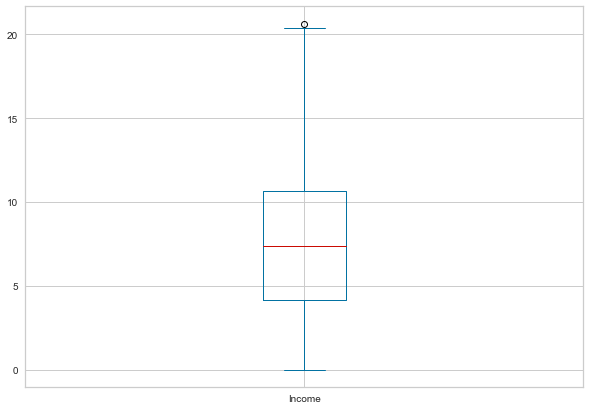

In [84]:
df_clean['Income'].plot(kind="box", figsize=(10, 7))

<AxesSubplot:>

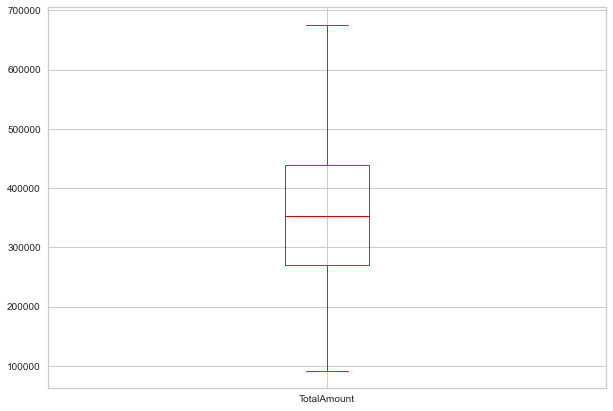

In [67]:
df_clean['TotalAmount'].plot(kind="box", figsize=(10, 7))

In [142]:
df_clean_copy = df_clean.copy()

In [143]:
df_clean = df_clean.drop(columns='CustomerID')

In [144]:
le = LabelEncoder()
le.fit(df_clean['Marital Status'])
df_clean['Marital Status'] = le.transform(df_clean['Marital Status'])
df_clean

Age  Gender  Marital Status  Income  TotalTransaction  TotalQty  \
0     55       1               0    5.12                17        60   
1     60       1               0    6.23                13        57   
2     32       1               0    9.17                15        56   
3     31       1               0    4.87                10        46   
4     58       1               0    3.57                 7        27   
..   ...     ...             ...     ...               ...       ...   
439   42       1               0   14.88                13        37   
440   53       0               0   15.31                18        62   
441   51       0               0   14.48                18        68   
442   57       0               0    7.81                11        42   
443   54       1               0   20.37                13        42   

     TotalAmount  
0         623300  
1         392300  
2         446200  
3         302500  
4         268600  
..           ...  
439       269400  
440       577700  
441       587200  
442       423300  
443       439300  

[432 rows x 7 columns]

In [145]:
scaler = StandardScaler()
scaler.fit(df_clean)
df_scaled = pd.DataFrame(scaler.transform(df_clean), 
                         columns=df_clean.columns)

### Dimension Reduction

In [146]:
pca = PCA(n_components=2)
pca.fit(df_clean)
reduced_data = pd.DataFrame(pca.transform(df_clean), columns=['col1','col2'])

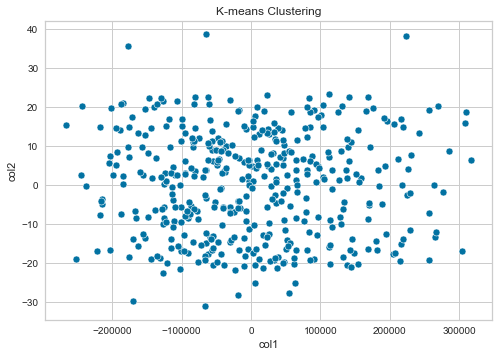

In [147]:
sns.scatterplot(x="col1", y="col2", data=reduced_data)
plt.title('K-means Clustering')
plt.show()

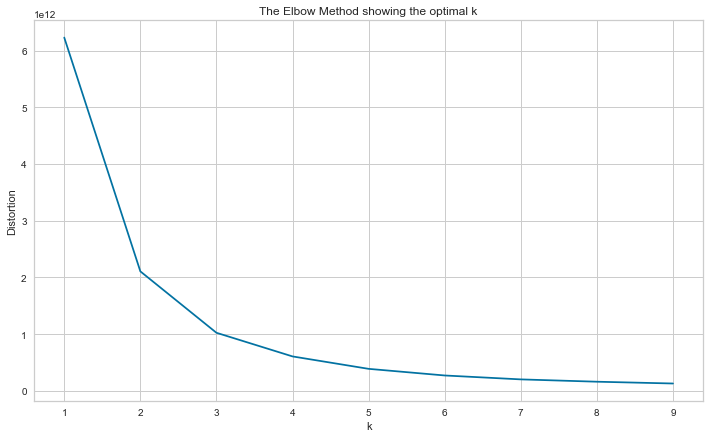

In [148]:
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(reduced_data)
    distortions.append(kmeanModel.inertia_)
    
plt.figure(figsize=(12,7))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

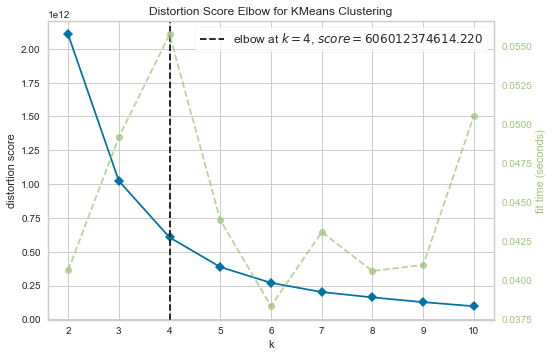

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [149]:
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(reduced_data)
Elbow_M.show()

In [150]:
kmeans = KMeans(n_clusters=4)
predict = kmeans.fit_predict(reduced_data)

In [151]:
silhouette_avg = silhouette_score(reduced_data, predict)
print("silhouette_score from cluster 4 :\n", silhouette_avg)

silhouette_score from cluster 4 :
 0.5322942857631914


In [152]:
reduced_data['cluster'] = predict
reduced_data.head()

col1       col2  cluster
0  264350.232271 -13.293854        2
1   33350.232988 -19.167245        1
2   87250.232569   7.601772        1
3  -56449.767813   9.022765        3
4  -90349.769382 -17.243953        3

**Hasil evaluasi model lebih bagus yang dibuang outlier daripada tidak**

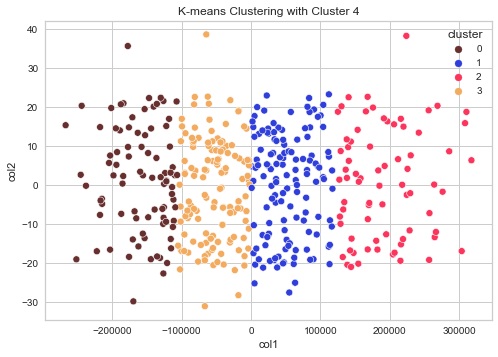

In [153]:
pal = ["#682F2F", "#303fdb", "#fc355d","#F3AB60"]
pal_5 = ["#682F2F","#B9C0C9", "#9F8A78","#F3AB60", "#303fdb"]

#Visualisasi yang terbentuk dari cluster = 4
sns.scatterplot(x="col1", y="col2", hue='cluster', data=reduced_data, palette=pal)
plt.title('K-means Clustering with Cluster 4')
plt.show()

In [154]:
result = df_clean_copy.copy().reset_index(drop=True)
result['Cluster_label'] = reduced_data['cluster']
result

CustomerID  Age  Gender Marital Status  Income  TotalTransaction  \
0             1   55       1        Married    5.12                17   
1             2   60       1        Married    6.23                13   
2             3   32       1        Married    9.17                15   
3             4   31       1        Married    4.87                10   
4             5   58       1        Married    3.57                 7   
..          ...  ...     ...            ...     ...               ...   
427         442   42       1        Married   14.88                13   
428         444   53       0        Married   15.31                18   
429         445   51       0        Married   14.48                18   
430         446   57       0        Married    7.81                11   
431         447   54       1        Married   20.37                13   

     TotalQty  TotalAmount  Cluster_label  
0          60       623300              2  
1          57       392300              1  
2          56       446200              1  
3          46       302500              3  
4          27       268600              3  
..        ...          ...            ...  
427        37       269400              3  
428        62       577700              2  
429        68       587200              2  
430        42       423300              1  
431        42       439300              1  

[432 rows x 9 columns]

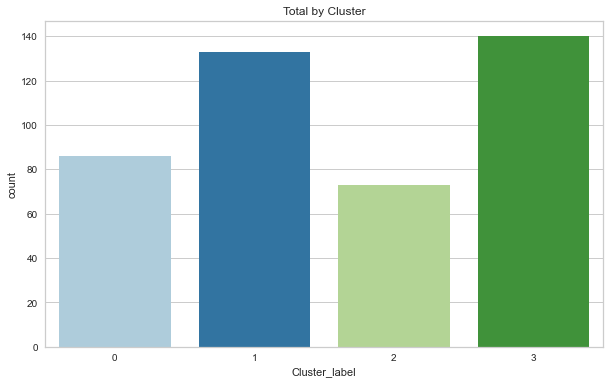

In [160]:
plt.subplots(1, figsize=(10, 6))
sns.countplot(x='Cluster_label', data=result, palette="Paired")
plt.title('Total by Cluster')
plt.show()

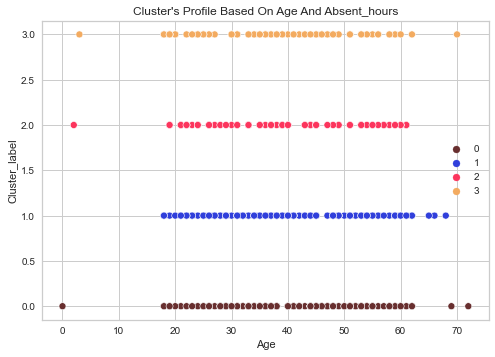

In [130]:
#Melihat pola cluster pada variable age dan absent_hours
pl = sns.scatterplot(data=result ,x=result["Age"], y=result["Cluster_label"],hue=result["Cluster_label"], palette= pal)
pl.set_title("Cluster's Profile Based On Age And Absent_hours")
plt.legend()
plt.show()

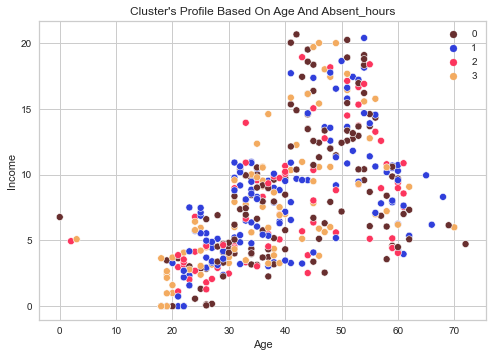

In [131]:
pl = sns.scatterplot(data=result ,x=result["Age"], y=result["Income"],hue=result["Cluster_label"], palette= pal)
pl.set_title("Cluster's Profile Based On Age And Absent_hours")
plt.legend()
plt.show()

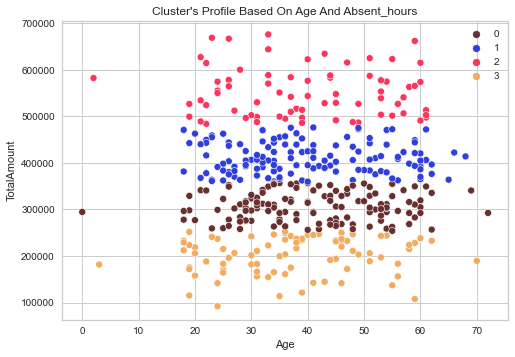

In [132]:
pl = sns.scatterplot(data=result ,x=result["Age"], y=result["TotalAmount"],hue=result["Cluster_label"], palette= pal)
pl.set_title("Cluster's Profile Based On Age And Absent_hours")
plt.legend()
plt.show()

In [136]:
result.groupby('Cluster_label').agg(['count','min','max','mean'])

Age                    Gender                   Income       \
              count min max       mean  count min max      mean  count  min   
Cluster_label                                                                 
0               140   0  72  40.750000    140   0   1  0.421429    140  0.0   
1               133  18  68  39.849624    133   0   1  0.458647    133  0.0   
2                73   2  61  39.821918     73   0   1  0.465753     73  0.0   
3                86   3  70  37.476744     86   0   1  0.500000     86  0.0   

               ... TotalTransaction            TotalQty                     \
               ...              max       mean    count min max       mean   
Cluster_label  ...                                                           
0              ...               15  10.200000      140  22  51  36.471429   
1              ...               16  12.308271      133  32  68  45.533835   
2              ...               21  15.328767       73  46  73  58.287671   
3              ...               13   7.197674       86  10  39  24.686047   

              TotalAmount                                 
                    count     min     max           mean  
Cluster_label                                             
0                     140  254000  356700  306195.000000  
1                     133  359900  476200  411439.849624  
2                      73  484000  676200  551369.863014  
3                      86   92100  252600  200319.767442  

[4 rows x 24 columns]

In [158]:
result.groupby(['Cluster_label']).agg({
    'CustomerID' : 'count',
    'TotalTransaction' : 'mean',
    'TotalQty' : 'mean',
    'TotalAmount' : 'mean'
})

CustomerID  TotalTransaction   TotalQty    TotalAmount
Cluster_label                                                        
0                      86          7.197674  24.686047  200319.767442
1                     133         12.308271  45.533835  411439.849624
2                      73         15.328767  58.287671  551369.863014
3                     140         10.200000  36.471429  306195.000000

pip install threadpoolctl

https://stackoverflow.com/questions/71352354/sklearn-kmeans-is-not-working-as-i-only-get-nonetype-object-has-no-attribute